# Bezoekers in een pretpark
Een pretpark wil kunnen voorspellen hoeveel bezoekers er zullen komen in een bepaalde maand. Daarvoor hebben ze gedurende 4 jaar opgeschreven hoeveel bezoekers er waren, voor iedere maand. Je vindt deze data in “pretpark.csv”.  Deze data is ook direct leesbaar in Python (geen foute of ontbrekende data). Je moet wel zorgen dat de kolom `aantal_bezoekers` een float wordt.

1.	Maak een grafiek van de data. Wat merk je visueel op? Stijgt of daalt het aantal bezoekers? Is er een patroon herkenbaar?

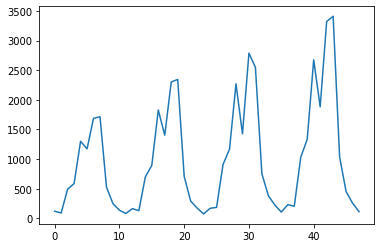

In [1]:
from scripts.forecast import *
import pandas as pd

pretpark = pd.read_csv('../datasets/pretpark.csv', sep=';')
pretpark.aantal_bezoekers = pretpark.aantal_bezoekers.astype(float)
_ = pretpark.aantal_bezoekers.plot()

# Er is een zeer duidelijk patroon herkenbaar, het patroon wordt ook steeds groter

2.	Zou je het additief of multiplicatief model gebruiken?

In [2]:
# Een multiplicatief model, want de trend groeit (wordt groter).
# Dit model zal ook de grootte van de schommelingen kunnen doen laten toenemen.

3.	Wat is de grootte van 1 “seizoen”?

array([ 1, 12,  2, 13, 11], dtype=int64)

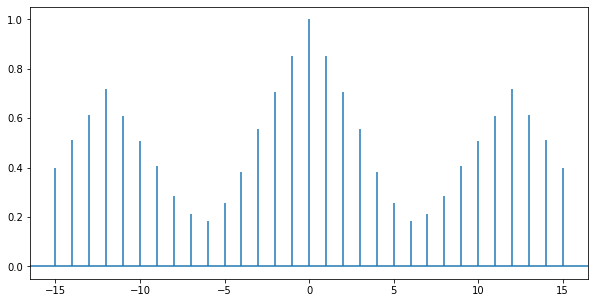

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
lags, acfs, _, _ = ax.acorr(pretpark.aantal_bezoekers, maxlags=15)
find_period(pretpark.aantal_bezoekers, maxlags=15, top_n=5)

# periode is dus 12 (periode 1 kunnen we verwaarlozen ook al is dat hoger).

4.	Doe nu een decompositie.  Plot deze in een diagram.

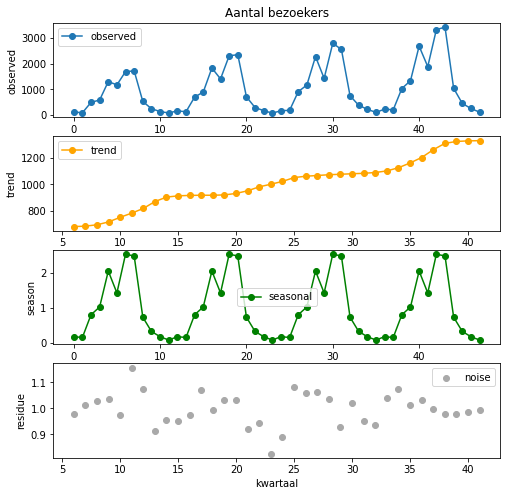

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

mult_model = seasonal_decompose(pretpark.aantal_bezoekers, model='multi', period=12)
# _ = mult_model.plot()
plot_seasonal_decompositon(mult_model, 'Aantal bezoekers')

5.	We gaan nu een model maken om voorspellingen te doen naar de toekomst. Doe een lineaire regressie op de trend en bepaal de slope en de intercept. Welke vergelijking vind je voor de trend?

In [4]:
reg_model = GeneralRegression()
x = np.arange(0, mult_model.trend.size)[~np.isnan(mult_model.trend)]
y = mult_model.trend[~np.isnan(mult_model.trend)]
reg_model.fit(x, y)
print('y = {:2f} * x + {:2f}'.format(reg_model.coef_[1], reg_model.intercept_))

y = 17.256226 * x + 596.926609


6.	Bereken de waarden van de trend voor het komende jaar.  Welke waarden kom je uit?

In [5]:
n = pretpark.aantal_bezoekers.size
seasonal_decomposition_forecast(reg_model, mult_model, n, n + 12, method='multiplicative', m=12)

array([ 264.52708869,  233.69501885, 1177.53997239, 1519.50994787,
       3057.16309306, 2155.94684296, 3863.01246423, 3822.0353943 ,
       1153.11623686,  526.4247529 ,  296.27318478,  144.42544994])

7.	Wat zijn de waarden van het seizoen?

In [27]:
pd.DataFrame(mult_model.seasonal.to_numpy().reshape(-1, 12), columns=range(1, 13))

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.185604,0.162009,0.806679,1.028785,2.045951,1.426356,2.526888,2.472179,0.737628,0.333068,0.185427,0.089425
1,0.185604,0.162009,0.806679,1.028785,2.045951,1.426356,2.526888,2.472179,0.737628,0.333068,0.185427,0.089425
2,0.185604,0.162009,0.806679,1.028785,2.045951,1.426356,2.526888,2.472179,0.737628,0.333068,0.185427,0.089425
3,0.185604,0.162009,0.806679,1.028785,2.045951,1.426356,2.526888,2.472179,0.737628,0.333068,0.185427,0.089425


8.	Vermenigvuldig de trend-waarden nu met het patroon. Je hebt nu een schatting van het aantal bezoekers voor het volgende jaar.  Welke waarden kom je uit (rond de waarden af op een geheel getal)?

In [31]:
# dit zijn dezelfde waarde dan diegene die we eerder vonden m.b.v. seasonal_decomposition_forecast, maar nu doen we het nog eens manueel over.
np.round(reg_model.predict(np.arange(n, n + 12).reshape(-1, 1)) * mult_model.seasonal[:12], 0)

0      265.0
1      234.0
2     1178.0
3     1520.0
4     3057.0
5     2156.0
6     3863.0
7     3822.0
8     1153.0
9      526.0
10     296.0
11     144.0
Name: seasonal, dtype: float64

9.	Wat is de MAE, RMSE en de MAPE? Wat is de betekenis van de MAPE?

In [33]:
predictions = seasonal_decomposition_forecast(reg_model, mult_model, 0, n, method='multiplicative', m=12)
forecast_errors(pretpark.aantal_bezoekers, predictions, method='mult_model')

,MAE,RMSE,MAPE
mult_model,41.173772,65.831631,0.055157
